# ICT 781 - Week 9

# Object-Oriented Programming II

Last week we were introduced to the concept of creating custom classes in Python. Recall that a class has two key features: **attributes** and **methods**. This week, we'll expand on custom classes and introduce a very important class from the Pandas data analysis package: the Pandas DataFrame.

## Creating a Deck of Cards

First, let's recall the Card class from last week.

In [ ]:
class Card:
    """ The playing card class for Cribbage. """
    
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value
        
        # Assign card colour based on suit.
        if suit in ['clubs','spades']:
            self.colour = 'black'
        else:
            self.colour = 'red'
            
        # Assign numerical value based on face value.
        if value in ['K','Q','J']:
            self.numvalue = 10
        else:
            self.numvalue = value
            
    def display(self):
        """ Print out all class attributes. """
        
        print('Card attributes:')
        print('{} of {}.'.format(self.value, self.suit))
        print('Numeric value is {}.'.format(self.numvalue))
        print()

For our purposes this week, we'll change this class a bit. First, instead of assigning both a value and a numerical value, we'll just use numerical values to identify the cards. For example, a 'Ten' will be a 10, a 'Jack' will be an 11, a 'Queen' will be a 12, and so on. Second, instead of passing in the `suit` argument, we'll **encode** the suits using the encoding scheme:

<table>
    <tr>
        <td> 0 </td>
        <td> $\rightarrow$ </td>
        <td> clubs </td>
    </tr>
    <tr>
        <td> 1 </td>
        <td> $\rightarrow$ </td>
        <td> spades </td>
    </tr>
    <tr>
        <td> 2 </td>
        <td> $\rightarrow$ </td>
        <td> diamonds </td>
    </tr>
    <tr>
        <td> 3 </td>
        <td> $\rightarrow$ </td>
        <td> hearts </td>
    </tr>
</table>

In [1]:
class Card:
    """ The general playing card class. """
    
    # Used in the 'display' method.
    suitList = ['Clubs','Spades','Diamonds','Hearts']
    numvalueList = [None,'Ace','2','3','4','5','6','7','8','9','10','Jack','Queen','King']
    
    def __init__(self, suit = 0, numvalue = 1):
        self.suit = suit
        self.numvalue = numvalue
        
        # Assign card colour based on suit.
        if suit in [0, 1]:
            self.colour = 'black'
        else:
            self.colour = 'red'
            
    def display(self):
        """ Print out the numvalue and the suit. """
    
        print('{} of {}'.format(self.numvalueList[self.numvalue], self.suitList[self.suit]))
    
jack_clubs = Card(0,11)
jack_clubs.display()

Jack of Clubs


Last week we created a deck of 52 cards by using a list comprehension. This solved the problem of creating a deck of cards, but now we'll look at the same task from a new perspective. We'll create a Deck class. At first this may seem redundant, but it should become clear why a class is a good container for a Deck of Cards.

In [2]:
class Deck:
    """ Deck class for containing cards. """
    
    def __init__(self):
        self.cards = [Card(suit, val) for suit in range(4) for val in range(1,14)]
        
    def printDeck(self):
        """ Method to print the contents of the Deck. """
        for card in self.cards:
            card.display()
            
deck = Deck()
deck.printDeck()

Ace of Clubs
2 of Clubs
3 of Clubs
4 of Clubs
5 of Clubs
6 of Clubs
7 of Clubs
8 of Clubs
9 of Clubs
10 of Clubs
Jack of Clubs
Queen of Clubs
King of Clubs
Ace of Spades
2 of Spades
3 of Spades
4 of Spades
5 of Spades
6 of Spades
7 of Spades
8 of Spades
9 of Spades
10 of Spades
Jack of Spades
Queen of Spades
King of Spades
Ace of Diamonds
2 of Diamonds
3 of Diamonds
4 of Diamonds
5 of Diamonds
6 of Diamonds
7 of Diamonds
8 of Diamonds
9 of Diamonds
10 of Diamonds
Jack of Diamonds
Queen of Diamonds
King of Diamonds
Ace of Hearts
2 of Hearts
3 of Hearts
4 of Hearts
5 of Hearts
6 of Hearts
7 of Hearts
8 of Hearts
9 of Hearts
10 of Hearts
Jack of Hearts
Queen of Hearts
King of Hearts


## Shuffling the Deck

You can see that our Deck is created and organized just like a deck of cards you would get from the store. Each suit is arranged in order by value. Usually when we play a game with cards, we need the Deck to be shuffled. Therefore, we'll define a `shuffle` method.

In [6]:
class Deck:
    """ Deck class for containing cards. """
    
    def __init__(self):
        self.cards = [Card(suit, val) for suit in range(4) for val in range(1,14)]
        
    def printDeck(self):
        """ Method to print the contents of the Deck. """
        for card in self.cards:
            card.display()
            
    def shuffle(self):
        """ Randomly shuffle the deck. """
        from random import shuffle
        
        return shuffle(self.cards)
        
deck = Deck()
deck.shuffle()
deck.printDeck()

Ace of Hearts
5 of Diamonds
6 of Hearts
Ace of Clubs
King of Diamonds
3 of Diamonds
4 of Clubs
King of Clubs
10 of Hearts
2 of Diamonds
2 of Spades
2 of Hearts
6 of Diamonds
6 of Clubs
Ace of Spades
King of Spades
7 of Hearts
2 of Clubs
Queen of Hearts
8 of Spades
4 of Spades
10 of Clubs
5 of Spades
7 of Diamonds
5 of Clubs
6 of Spades
3 of Clubs
Jack of Spades
7 of Clubs
Ace of Diamonds
5 of Hearts
10 of Diamonds
4 of Hearts
Jack of Clubs
4 of Diamonds
Queen of Clubs
Jack of Diamonds
Jack of Hearts
9 of Spades
9 of Diamonds
3 of Spades
3 of Hearts
10 of Spades
Queen of Diamonds
Queen of Spades
9 of Clubs
7 of Spades
8 of Diamonds
9 of Hearts
8 of Clubs
8 of Hearts
King of Hearts


## Removing Cards from the Deck

In any card game, the cards are all taken from the same deck. Therefore, we'll define a method that removes a specified card from the list of Cards contained in the Deck.

In [7]:
class Deck:
    """ Deck class for containing cards. """
    
    def __init__(self):
        self.cards = [Card(suit,val) for suit in range(4) for val in range(1,14)]
        
    def printDeck(self):
        """ Method to print the contents of the Deck. """
        for card in self.cards:
            card.display()
            
    def shuffle(self):
        """ Randomly shuffle the deck. """
        from random import shuffle
        
        return shuffle(self.cards)
    
    def removeCard(self, card):
        """ Remove a card from the deck. """
                
        if card in self.cards:
            self.cards.remove(card)
            return True
        else:
            return False
        
deck = Deck()
C = Card(0,1)

deck.removeCard(C)
deck.printDeck()

Ace of Clubs
2 of Clubs
3 of Clubs
4 of Clubs
5 of Clubs
6 of Clubs
7 of Clubs
8 of Clubs
9 of Clubs
10 of Clubs
Jack of Clubs
Queen of Clubs
King of Clubs
Ace of Spades
2 of Spades
3 of Spades
4 of Spades
5 of Spades
6 of Spades
7 of Spades
8 of Spades
9 of Spades
10 of Spades
Jack of Spades
Queen of Spades
King of Spades
Ace of Diamonds
2 of Diamonds
3 of Diamonds
4 of Diamonds
5 of Diamonds
6 of Diamonds
7 of Diamonds
8 of Diamonds
9 of Diamonds
10 of Diamonds
Jack of Diamonds
Queen of Diamonds
King of Diamonds
Ace of Hearts
2 of Hearts
3 of Hearts
4 of Hearts
5 of Hearts
6 of Hearts
7 of Hearts
8 of Hearts
9 of Hearts
10 of Hearts
Jack of Hearts
Queen of Hearts
King of Hearts


This seemingly simple task has one wrinkle: it won't remove cards properly! In line 23, when we make the comparison `if card in self.cards()`, the Python interpreter uses the keyword `in` to determine if the `card` object is the self-same object in the Deck. 

This comparison needs to be understood before we go on to correct the problem. Let's review what happens when we call the `removeCard` method. We pass in the argument `Card(...)` with its suit and value. The method `removeCard` then compares our passed-in argument to all of the cards in the Deck. However, `removeCard` doesn't just check if the attributes are the same, but if the card we passed in **is** an object in the Deck. This is called a **deep comparison**. Therefore, `removeCard` will always return `False`, since we are asking it to find our newly created `Card(...)` argument in a list of previously created cards, which is impossible.

To get around this problem, we need to do something technical.

### Operator Overloading

We are going to tell the Python interpreter exactly how to check if two cards are equal. This means that we will be changing the meaning of the relational operator `==`. When we change the default behaviour of a Python operator, we call it **operator overloading**. We'll define our overloaded operator in a method called `__eq__` (short for equals).

In [9]:
class Card:
    """ The general playing card class. """
    
    # Used in the 'display' method.
    suitList = ['Clubs','Spades','Diamonds','Hearts']
    numvalueList = [None,'Ace','2','3','4','5','6','7','8','9','10','Jack','Queen','King']
    
    def __init__(self, suit = 0, numvalue = 1):
        self.suit = suit
        self.numvalue = numvalue
        
        # Assign card colour based on suit.
        if suit in [0, 1]:
            self.colour = 'black'
        else:
            self.colour = 'red'
            
    def __eq__(self, other):
        """ Overloading the equals operator. """
        
        # First check the suits.
        if self.suit > other.suit:
            return False
        if self.suit < other.suit:
            return False
        
        # If the suits are equal, check the values.
        if self.numvalue > other.numvalue:
            return False
        if self.numvalue < other.numvalue:
            return False
        
        # If the suits and values are equal, the cards are equal.
        return True
            
    def display(self):
        """ Print out all class attributes. """
    
        print('{} of {}'.format(self.numvalueList[self.numvalue], self.suitList[self.suit]))

class Deck:
    """ Deck class for containing cards. """
    
    def __init__(self):
        self.cards = [Card(suit,val) for suit in range(4) for val in range(1,14)]
        
    def printDeck(self):
        """ Method to print the contents of the Deck. """
        for card in self.cards:
            card.display()
            
    def shuffle(self):
        """ Randomly shuffle the deck. """
        from random import shuffle
        
        return shuffle(self.cards)
    
    def removeCard(self, card):
        """ Remove a card from the deck. """
                                
        if card in self.cards:
            self.cards.remove(card)
            return True
        else:
            return False
        
deck = Deck()
deck.printDeck()
print()

# Remove the Ace of Clubs.
deck.removeCard(Card(0,1))
deck.printDeck()

Ace of Clubs
2 of Clubs
3 of Clubs
4 of Clubs
5 of Clubs
6 of Clubs
7 of Clubs
8 of Clubs
9 of Clubs
10 of Clubs
Jack of Clubs
Queen of Clubs
King of Clubs
Ace of Spades
2 of Spades
3 of Spades
4 of Spades
5 of Spades
6 of Spades
7 of Spades
8 of Spades
9 of Spades
10 of Spades
Jack of Spades
Queen of Spades
King of Spades
Ace of Diamonds
2 of Diamonds
3 of Diamonds
4 of Diamonds
5 of Diamonds
6 of Diamonds
7 of Diamonds
8 of Diamonds
9 of Diamonds
10 of Diamonds
Jack of Diamonds
Queen of Diamonds
King of Diamonds
Ace of Hearts
2 of Hearts
3 of Hearts
4 of Hearts
5 of Hearts
6 of Hearts
7 of Hearts
8 of Hearts
9 of Hearts
10 of Hearts
Jack of Hearts
Queen of Hearts
King of Hearts

2 of Clubs
3 of Clubs
4 of Clubs
5 of Clubs
6 of Clubs
7 of Clubs
8 of Clubs
9 of Clubs
10 of Clubs
Jack of Clubs
Queen of Clubs
King of Clubs
Ace of Spades
2 of Spades
3 of Spades
4 of Spades
5 of Spades
6 of Spades
7 of Spades
8 of Spades
9 of Spades
10 of Spades
Jack of Spades
Queen of Spades
King of Spade

From the output, we see that the Ace of Clubs is now gone from the Deck. 

We also want to be able to remove the top card from the Deck. We'll add another method called `popCard` to accomplish this. We'll also add a method called `isEmpty` to tell us when then are no more cards in the Deck.

We'll test the `popCard` method by popping 26 cards from the top of the deck.

In [10]:
class Deck:
    """ Deck class for containing cards. """
    
    def __init__(self):
        self.cards = [Card(suit,val) for suit in range(4) for val in range(1,14)]
        
    def printDeck(self):
        """ Method to print the contents of the Deck. """
        for card in self.cards:
            card.display()
            
    def shuffle(self):
        """ Randomly shuffle the deck. """
        
        from random import shuffle
        
        d = shuffle(self.cards)
        return d
    
    def removeCard(self, card):
        """ Remove a card from the deck. """
                        
        if card in self.cards:
            self.cards.remove(card)
            return True
        else:
            return False
        
    def popCard(self):
        """ Remove a card from the top of the deck. """
        
        return self.cards.pop()
    
    def isEmpty(self):
        """ Determine when no cards are left in the deck. """
        
        return (len(self.cards) == 0)
    
deck = Deck()
for _ in range(26):
    deck.popCard()
    
deck.printDeck()
print(deck.isEmpty())

Ace of Clubs
2 of Clubs
3 of Clubs
4 of Clubs
5 of Clubs
6 of Clubs
7 of Clubs
8 of Clubs
9 of Clubs
10 of Clubs
Jack of Clubs
Queen of Clubs
King of Clubs
Ace of Spades
2 of Spades
3 of Spades
4 of Spades
5 of Spades
6 of Spades
7 of Spades
8 of Spades
9 of Spades
10 of Spades
Jack of Spades
Queen of Spades
King of Spades
False


## Object Inheritance

This is our last topic in the dedicated study of objects. For most card games, players take cards from the deck into their own 'hand'. A hand is like a deck, but it has a limited number of cards. For example, in Cribbage, each player starts with 6 cards. In this section, we'll define the `Hand` class and add a `deal` method to the `Deck` class.

Since each player's hand is like a deck, we'll define the `Hand` class as a **child** class of the `Deck` class (the **parent** class). Each hand will have two attributes: cards and name (the player's name).

In [11]:
class Hand(Deck):
    """ Class to represent a player's hand. """
    
    def __init__(self, name):
        self.name = name
        self.cards = []

The `Hand` class will need methods to add and remove cards from itself. Luckily, since `Hand` is a child class or **sub-class** of `Deck`, it **inherits** the methods of the parent class. Therefore, `removeCard` and `popCard` are already defined. We just need to define the `addCard` method.

In [12]:
class Hand(Deck):
    """ Class to represent a player's hand. """
    
    def __init__(self, name):
        self.name = name
        self.cards = []
        
    def addCard(self, card):
        """ Add a card to the Hand. """
        self.cards.append(card)

Now we'll define the `deal` method for the `Deck` class. We're adding this method to the `Deck` class since it is unlikely that we will need to deal out cards from a player's Hand. The `deal` method will have two arguments: a list of Hand names and the number of cards to be dealt to each Hand.

We'll create a list of players, then deal out 7 cards to each player and display each player's hand.

In [13]:
class Deck:
    """ Deck class for containing cards. """
    
    def __init__(self):
        self.cards = [Card(suit,val) for suit in range(4) for val in range(1,14)]
        
    def printDeck(self):
        """ Method to print the contents of the Deck. """
        for card in self.cards:
            card.display()
        print()
            
    def shuffle(self):
        """ Randomly shuffle the deck. """
        
        from random import shuffle
        
        d = shuffle(self.cards)
        return d
    
    def removeCard(self, card):
        """ Remove a card from the deck. """
                        
        if card in self.cards:
            self.cards.remove(card)
            return True
        else:
            return False
        
    def popCard(self):
        """ Remove a card from the top of the deck. """
        
        return self.cards.pop()
    
    def isEmpty(self):
        """ Determine when no cards are left in the deck. """
        
        return (len(self.cards) == 0)
    
    def deal(self, players, num_cards = 5):
        """ Deal out 'num_cards' to each player in 'players'. """
        
        N = len(players)
        
        # The total number of cards to be dealt.
        NCards = N*num_cards
        
        for i in range(NCards):
            
            # Do not continue if no cards are left in the deck. --- optional
            if self.isEmpty():
                break
            
            # Deal the top card, then add it to the next player's hand.
            card = self.popCard()
            hand = players[i % N]
            hand.addCard(card)

# Initialize the players and the deck.
names = ['Harry','Marv','Kevin','Fuller']
deck = Deck()
players = [Hand(name) for name in names]

deck.shuffle()

# Deal the hands.
deck.deal(players, 7)

# Print each player's hand.
for player in players:
    player.printDeck()
    print()

3 of Clubs
Queen of Diamonds
Queen of Hearts
King of Hearts
6 of Hearts
3 of Spades
10 of Hearts

King of Clubs
Ace of Clubs
10 of Diamonds
8 of Hearts
Jack of Hearts
7 of Clubs
2 of Hearts

King of Diamonds
5 of Clubs
7 of Diamonds
8 of Spades
3 of Hearts
Queen of Clubs
6 of Clubs

9 of Clubs
8 of Clubs
6 of Spades
Jack of Diamonds
4 of Hearts
5 of Spades
9 of Hearts



In [15]:
# Example of an idea to start programming a game.

class Game:
    def __init__(self, num_players, player_names):
        self.title = title
        self.deck = Deck()
        self.players = [Hand(name) for name in player_names]

## A Brief Introduction to Pandas

Pandas is one of the major Python packages for data analysis. We will only touch on the most fundamental feature of Pandas: importing data into Python.

Data is often found in .csv (comma-separated) files. These files are usually created by direct data entry into a spreadsheet program. The 'books.csv' file is in the same folder as this Jupyter notebook. We'll import the Pandas package and then read the data into Jupyter.

In [16]:
try:
    import pandas as pd
except:
    !pip install --user pandas

import numpy as np 

file = pd.read_csv('books.csv')

That's it! The books.csv file is now available for analysis. It has been imported as a `DataFrame` object. However, we would like to see the data to check that the dataset is complete and the import worked as expected.

We can view the `file` object by simply calling typing `file` in a Jupyter cell.

In [17]:
file

,Title,Author,Genre,Pages,Publisher
0,Fundamentals of Wavelets,"Goswami, Jaideva",signal_processing,228,Wiley
1,Data Smart,"Foreman, John",data_science,235,Wiley
2,God Created the Integers,"Hawking, Stephen",mathematics,197,Penguin
3,Superfreakonomics,"Dubner, Stephen",economics,179,HarperCollins
4,Orientalism,"Said, Edward",history,197,Penguin
5,"Nature of Statistical Learning Theory, The","Vapnik, Vladimir",data_science,230,Springer
6,Integration of the Indian States,"Menon, V P",history,217,Orient Blackswan
7,"Drunkard's Walk, The","Mlodinow, Leonard",science,197,Penguin
8,Image Processing & Mathematical Morphology,"Shih, Frank",signal_processing,241,CRC
9,How to Think Like Sherlock Holmes,"Konnikova, Maria",psychology,240,Penguin


We can also display specific columns of the dataframe by using a similar technique to accessing list elements by index. Instead of specifying an index, we now specify the column name.

In [18]:
# Display all of the book authors.
file_authors = file['Author']
file_authors

0         Goswami, Jaideva
1            Foreman, John
2         Hawking, Stephen
3          Dubner, Stephen
4             Said, Edward
5         Vapnik, Vladimir
6               Menon, V P
7        Mlodinow, Leonard
8              Shih, Frank
9         Konnikova, Maria
10     Sebastian Gutierrez
11          Vonnegut, Kurt
12         Villani, Cedric
13         Sussman, Gerald
14          Eraly, Abraham
15            Kafka, Frank
16             Pratt, John
17          Nisbet, Robert
18            Wells, H. G.
19      Heisenberg, Werner
20              Oram, Andy
21            Tao, Terence
22            Conway, Drew
23            Silver, Nate
24           McKinney, Wes
25          Cormen, Thomas
26         Deb, Siddhartha
27           Camus, Albert
28     Doyle, Arthur Conan
29     Doyle, Arthur Conan
              ...         
181            Sagan, Carl
182              Bell, E T
183       Dawkins, Richard
184      Ranjan, Sudhanshu
185               Kautiyla
186             Palkhivala
1

In [ ]:
# Display all of the book authors AND publishers.
file_authors_and_publishers = file[['Author','Publisher']]
file_authors_and_publishers

From looking at the displayed data, we can see several missing entries, which are represented by 'not a number' or `NaN`. If we want to remove these entries, we may define a new dataset and call the `dropna` method of our `file` object.

The argument of the `dropna` method is specified as `axis = 0`, which means drop any *row* with missing values. If you specify `axis = 1`, you will drop any *column* with missing values.

In [19]:
file_nomissing = file.dropna(axis = 0)
file_nomissing

,Title,Author,Genre,Pages,Publisher
0,Fundamentals of Wavelets,"Goswami, Jaideva",signal_processing,228,Wiley
1,Data Smart,"Foreman, John",data_science,235,Wiley
2,God Created the Integers,"Hawking, Stephen",mathematics,197,Penguin
3,Superfreakonomics,"Dubner, Stephen",economics,179,HarperCollins
4,Orientalism,"Said, Edward",history,197,Penguin
5,"Nature of Statistical Learning Theory, The","Vapnik, Vladimir",data_science,230,Springer
6,Integration of the Indian States,"Menon, V P",history,217,Orient Blackswan
7,"Drunkard's Walk, The","Mlodinow, Leonard",science,197,Penguin
8,Image Processing & Mathematical Morphology,"Shih, Frank",signal_processing,241,CRC
9,How to Think Like Sherlock Holmes,"Konnikova, Maria",psychology,240,Penguin


Now we'll make a quick histogram of the remaining data by number of pages. In this case, our histogram will plot how many books have total pages within given ranges.

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c9b60f940>]]


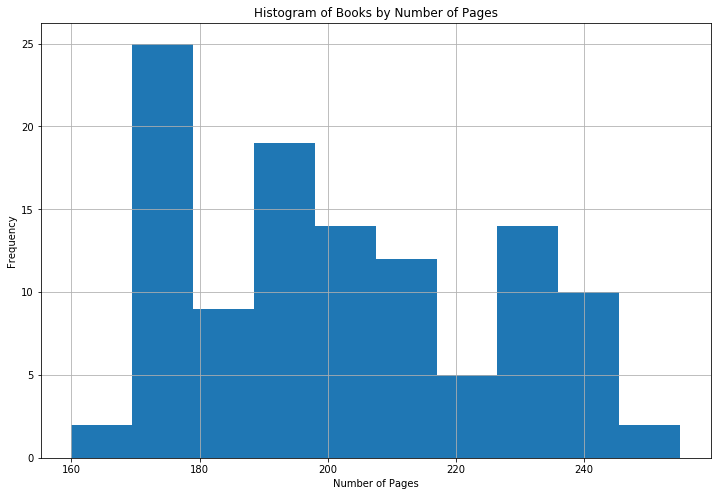

In [76]:
%matplotlib inline
# The above command is only for Jupyter.

# This line plots the histogram.
ax = file_nomissing.hist(column = 'Pages', figsize = (12,8))
print(ax)

# These lines set the title and axis labels.
ax[0][0].set_title('Histogram of Books by Number of Pages')
ax[0][0].set_xlabel('Number of Pages')
ax[0][0].set_ylabel('Frequency');

## *Exercises*

<ul>
    <li> Rewrite the <code>__eq__</code> method in the Card class so that the 'Ace' card has higher value that the 'King' card. </li>
</ul>

In [28]:
class Card:
    """ The general playing card class. """
    
    # Used in the 'display' method.
    suitList = ['Clubs','Spades','Diamonds','Hearts']
    numvalueList = [None,None,'2','3','4','5','6','7','8','9','10','Jack','Queen','King','Ace']
    
    def __init__(self, suit = 0, numvalue = 1):
        self.suit = suit
        self.numvalue = numvalue
        
        # Assign card colour based on suit.
        if suit in [0, 1]:
            self.colour = 'black'
        else:
            self.colour = 'red'
            
    def __eq__(self, other):
        """ Overloading the equals operator. """
        
        # First check the suits.
        if self.suit > other.suit:
            return False
        if self.suit < other.suit:
            return False
        
        # If the suits are equal, check the values.
        if self.numvalue > other.numvalue:
            return False
        if self.numvalue < other.numvalue:
            return False
        
        # If the suits and values are equal, the cards are equal.
        return True
            
    def display(self):
        """ Print out all class attributes. """
    
        print('{} of {}'.format(self.numvalueList[self.numvalue], self.suitList[self.suit]))

Just for fun, let's also change the `Deck` class to be configured for a game of Poker.

In [29]:
class Deck:
    """ Deck class for containing cards. """
    
    def __init__(self):
        self.cards = [Card(suit,val) for suit in range(4) for val in range(2,15)]
        
    def printDeck(self):
        """ Method to print the contents of the Deck. """
        for card in self.cards:
            card.display()
            
    def shuffle(self):
        """ Randomly shuffle the deck. """
        from random import shuffle
        
        return shuffle(self.cards)
    
    def removeCard(self, card):
        """ Remove a card from the deck. """
                        
        if card in self.cards:
            self.cards.remove(card)
            return True
        else:
            return False
        
    def popCard(self):
        """ Remove a card from the top of the deck. """
        
        return self.cards.pop()
    
    def isEmpty(self):
        """ Determine when no cards are left in the deck. """
        
        return (len(self.cards) == 0)

poker_deck = Deck()
poker_deck.printDeck()

2 of Clubs
3 of Clubs
4 of Clubs
5 of Clubs
6 of Clubs
7 of Clubs
8 of Clubs
9 of Clubs
10 of Clubs
Jack of Clubs
Queen of Clubs
King of Clubs
Ace of Clubs
2 of Spades
3 of Spades
4 of Spades
5 of Spades
6 of Spades
7 of Spades
8 of Spades
9 of Spades
10 of Spades
Jack of Spades
Queen of Spades
King of Spades
Ace of Spades
2 of Diamonds
3 of Diamonds
4 of Diamonds
5 of Diamonds
6 of Diamonds
7 of Diamonds
8 of Diamonds
9 of Diamonds
10 of Diamonds
Jack of Diamonds
Queen of Diamonds
King of Diamonds
Ace of Diamonds
2 of Hearts
3 of Hearts
4 of Hearts
5 of Hearts
6 of Hearts
7 of Hearts
8 of Hearts
9 of Hearts
10 of Hearts
Jack of Hearts
Queen of Hearts
King of Hearts
Ace of Hearts


<ul> 
    <li> Execute the next cell to see the output from <code>print(deck)</code>. Write a method called <code>__str__</code> in the Deck class that prints out each card in the Deck, but in the format <code>numvalue, suit</code>, where <code>suit</code> is the name of the suit instead of the number. Your method should take in no arguments and should return a tuple in the specified form. Writing this function is an example of overloading the <code>__str__</code> operator. You can see the difference when you use <code>print(deck)</code>.

In [31]:
print(deck)

In [52]:
class Deck:
    """ Deck class for containing cards. """
    
    def __init__(self):
        self.cards = [Card(suit,val) for suit in range(4) for val in range(2,15)]
        
    def printDeck(self):
        """ Method to print the contents of the Deck. """
        for card in self.cards:
            card.display()
            
    def shuffle(self):
        """ Randomly shuffle the deck. """
        from random import shuffle
        
        return shuffle(self.cards)
    
    def removeCard(self, card):
        """ Remove a card from the deck. """
                        
        if card in self.cards:
            self.cards.remove(card)
            return True
        else:
            return False
        
    def popCard(self):
        """ Remove a card from the top of the deck. """
        
        return self.cards.pop()
    
    def isEmpty(self):
        """ Determine when no cards are left in the deck. """
        
        return (len(self.cards) == 0)
    
    def deal(self, players, num_cards = 5):
        """ Deal out 'num_cards' to each player in 'players'. """
        
        N = len(players)
        
        # The total number of cards to be dealt.
        NCards = N*num_cards
        
        for i in range(NCards):
            
            # Do not continue if no cards are left in the deck. --- optional
            if self.isEmpty():
                break
            
            # Deal the top card, then add it to the next player's hand.
            card = self.popCard()
            hand = players[i % N]
            hand.addCard(card)
    
    def __str__(self):
        suits = ['Clubs','Spades','Diamonds','Hearts']
        
        output = ''
        for i in range(len(self.cards)):
            output += str(self.cards[i].numvalue) + ", " + suits[self.cards[i].suit] + '\n'
                    
        return output
        
deck = Deck()
print(deck)

2, Clubs
3, Clubs
4, Clubs
5, Clubs
6, Clubs
7, Clubs
8, Clubs
9, Clubs
10, Clubs
11, Clubs
12, Clubs
13, Clubs
14, Clubs
2, Spades
3, Spades
4, Spades
5, Spades
6, Spades
7, Spades
8, Spades
9, Spades
10, Spades
11, Spades
12, Spades
13, Spades
14, Spades
2, Diamonds
3, Diamonds
4, Diamonds
5, Diamonds
6, Diamonds
7, Diamonds
8, Diamonds
9, Diamonds
10, Diamonds
11, Diamonds
12, Diamonds
13, Diamonds
14, Diamonds
2, Hearts
3, Hearts
4, Hearts
5, Hearts
6, Hearts
7, Hearts
8, Hearts
9, Hearts
10, Hearts
11, Hearts
12, Hearts
13, Hearts
14, Hearts



<ul>
    <li> Write a <code>display</code> method for the <code>Hand</code> class that displays the current cards in a player's hand. </li>
</ul>

In [56]:
class Hand(Deck):
    """ Class to represent a player's hand. """
    
    def __init__(self, name):
        self.name = name
        self.cards = []
        
    def addCard(self, card):
        """ Add a card to the Hand. """
        self.cards.append(card)
        
    def display(self):
        """ Display the cards in the Hand. """
        print('{} has these cards:'.format(self.name))
        for card in self.cards:
            card.display()
        print()
            
deck = Deck()
names = ['Harry','Marv','Kevin','Fuller']
players = [Hand(name) for name in names]

deck.shuffle()
deck.deal(players, 2)

for player in players:
    player.display()

Harry has these cards:
10 of Spades
7 of Diamonds

Marv has these cards:
3 of Hearts
10 of Hearts

Kevin has these cards:
10 of Diamonds
Jack of Diamonds

Fuller has these cards:
Ace of Spades
4 of Clubs



<ul>
    <li> The <code>facebook.csv</code> file contains daily Facebook stock prices between 2013 and 2018. The 'Gain' column represents the overall gain in stock price on that day. Using Pandas, load in the dataset contained in <code>facebook.csv</code> and make a histogram of the 'Gain' variable. (Don't worry about labeling the axes for now.) </li>
</ul>

In [57]:
import pandas as pd

fb = pd.read_csv('facebook.csv')

In [58]:
print(np.min(fb['Gain']))

-9.429993


In [68]:
fb.loc[fb['Gain'] == np.min(fb['Gain'])]

,Date,Open,High,Low,Close,Adj Close,Volume,Gain
1191,2/8/2018,181.009995,181.839996,171.479996,171.580002,171.580002,38478300,-9.429993


In [69]:
fb.loc[fb['Gain'] == np.max(fb['Gain'])]

,Date,Open,High,Low,Close,Adj Close,Volume,Gain
1232,4/10/2018,157.929993,165.979996,157.009995,165.039993,165.039993,57889300,7.11


In [70]:
z = fb.loc[fb['Gain'] == np.max(fb['Gain'])]

In [71]:
print(z)

           Date        Open        High         Low       Close   Adj Close  \
1232  4/10/2018  157.929993  165.979996  157.009995  165.039993  165.039993   

        Volume  Gain  
1232  57889300  7.11  


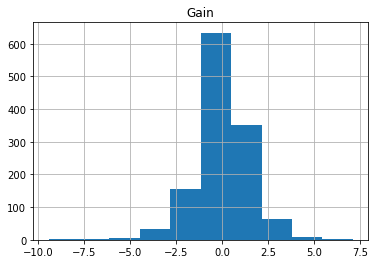

In [75]:
%matplotlib inline

fb.hist(column = 'Gain');